In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("/diabetes_prediction_dataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
Dataset Info:
 None

Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype

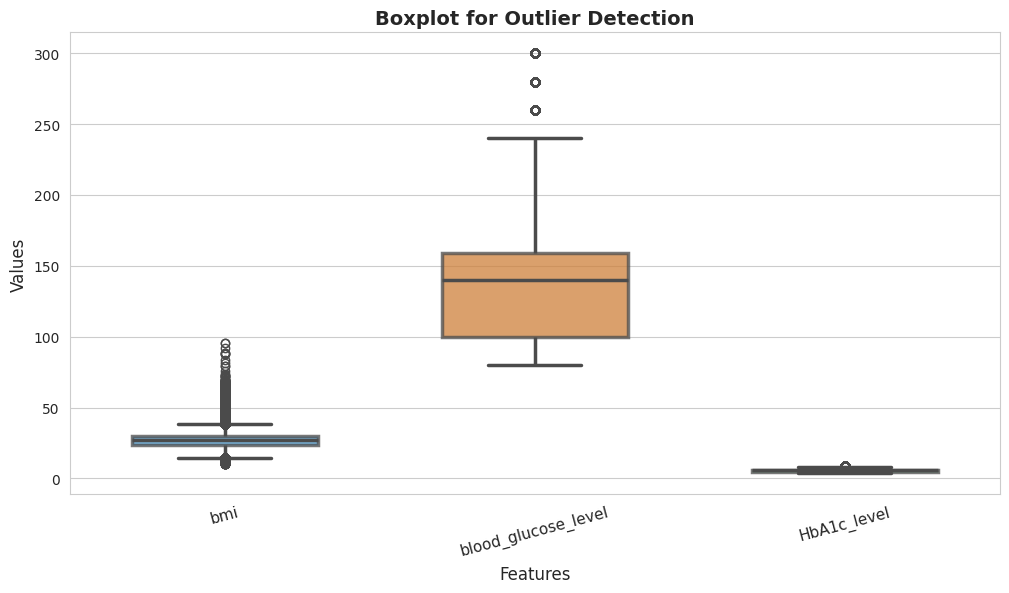

In [3]:
# 1. Data Quality and Integrity Check
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean and modern style
sns.set_style("whitegrid")

# Increase figure size for better visibility
plt.figure(figsize=(12, 6))

# Use different colors for better contrast
palette = ["#3498db", "#e67e22", "#2ecc71"]

# Create the boxplot with improved visuals
sns.boxplot(data=df[['bmi', 'blood_glucose_level', 'HbA1c_level']],
            palette=palette,
            linewidth=2.5,
            width=0.6,
            boxprops=dict(alpha=0.75))

# Improve title and labels
plt.title("Boxplot for Outlier Detection", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=11)

# Show the updated plot
plt.show()



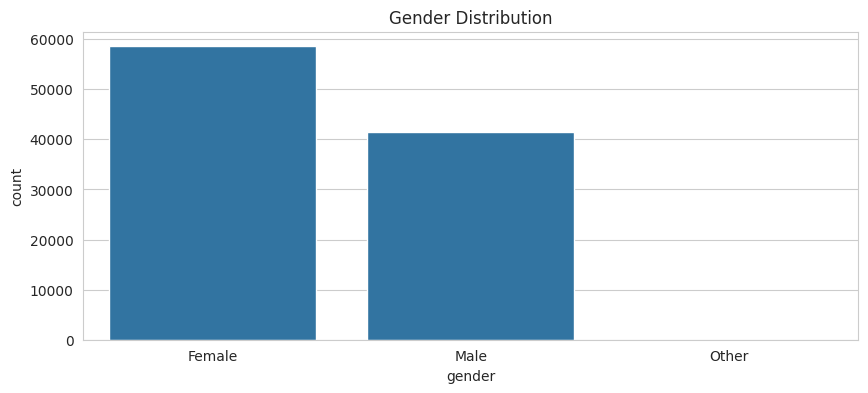

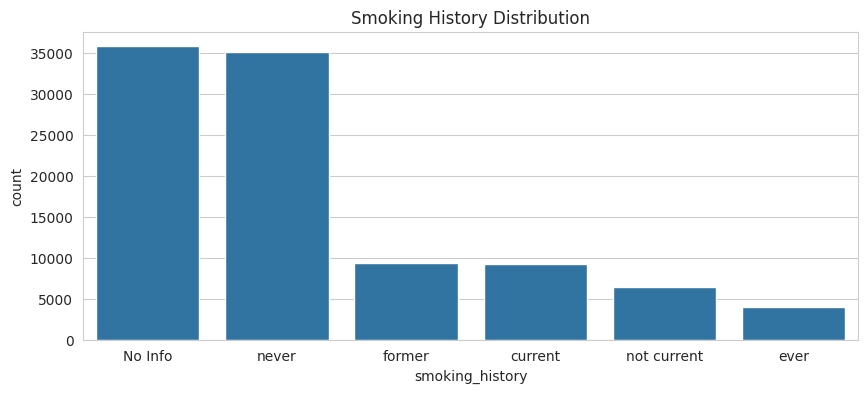

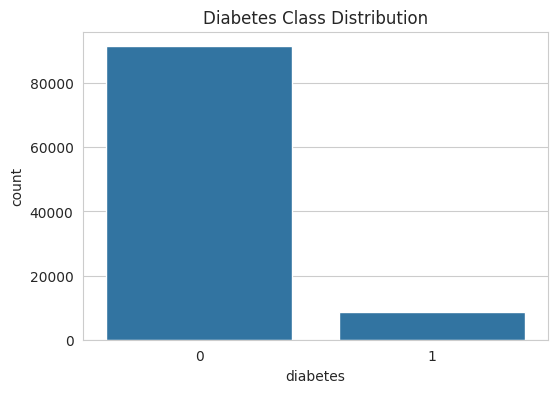

In [4]:
# Distribution of Categorical Features
plt.figure(figsize=(10,4))
sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='smoking_history', data=df, order=df['smoking_history'].value_counts().index)
plt.title("Smoking History Distribution")
plt.show()

# Class Distribution of Diabetes
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Class Distribution")
plt.show()

-The dataset contains gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes outcome.

-No missing values detected.

-Gender and smoking history are categorical, while others are numerical.

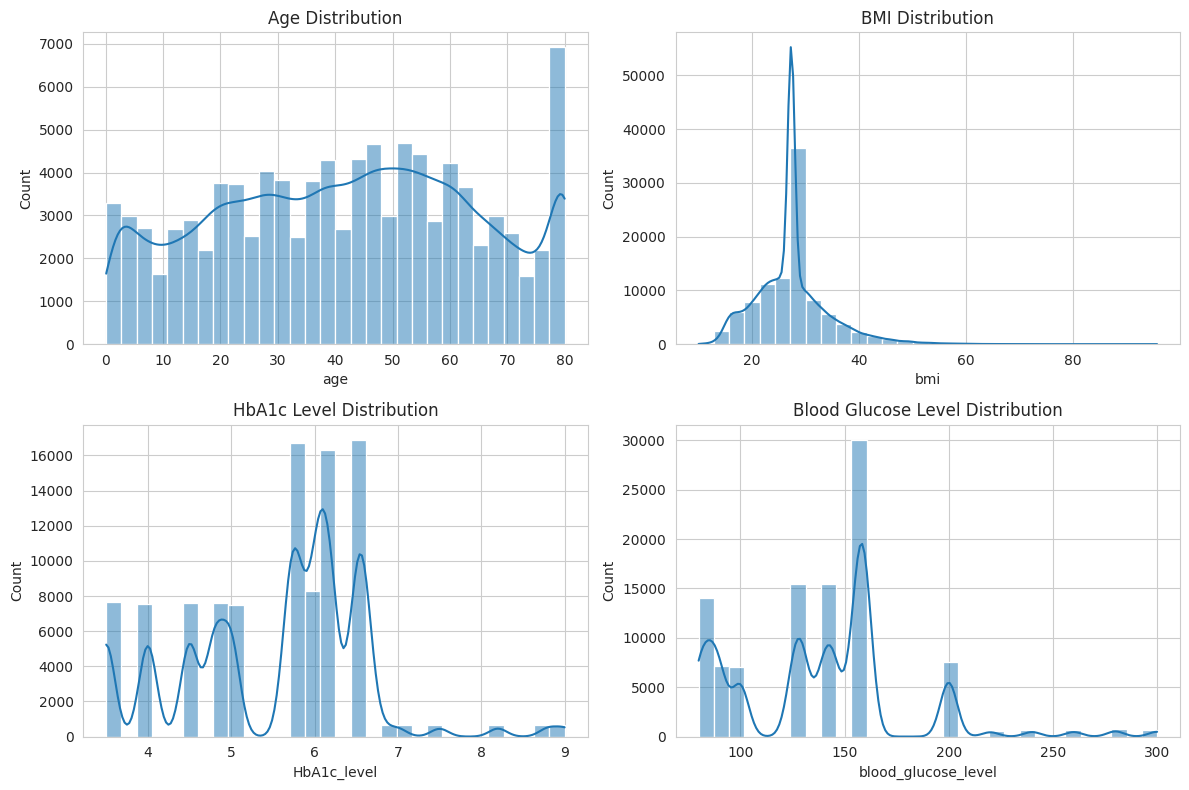

In [5]:

# 2. Univariate Analysis
fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("BMI Distribution")

sns.histplot(df['HbA1c_level'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("HbA1c Level Distribution")

sns.histplot(df['blood_glucose_level'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Blood Glucose Level Distribution")

plt.tight_layout()
plt.show()

# Categorizing BMI
def categorize_bmi(value):
    if value < 18.5:
        return "Underweight"
    elif 18.5 <= value < 25:
        return "Normal"
    elif 25 <= value < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(categorize_bmi)


-Age follows a right-skewed distribution, meaning most individuals are younger.

-BMI appears normally distributed with some outliers.

-Blood glucose levels show a bimodal distribution, possibly separating diabetic and non-diabetic groups.

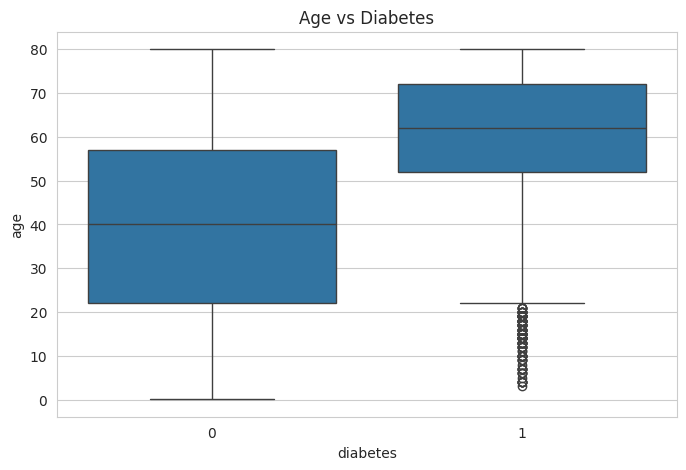

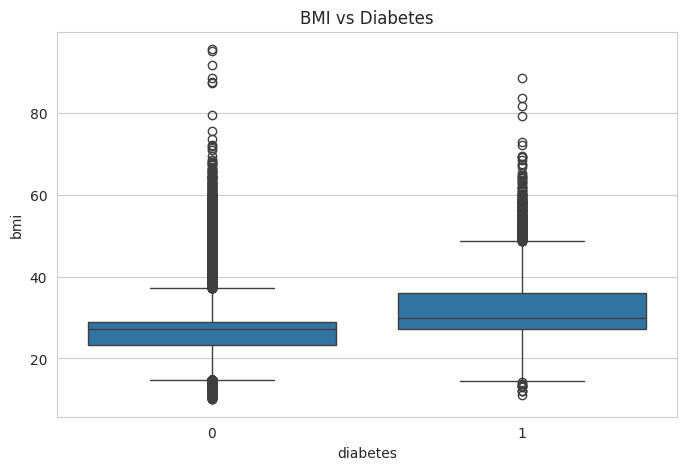

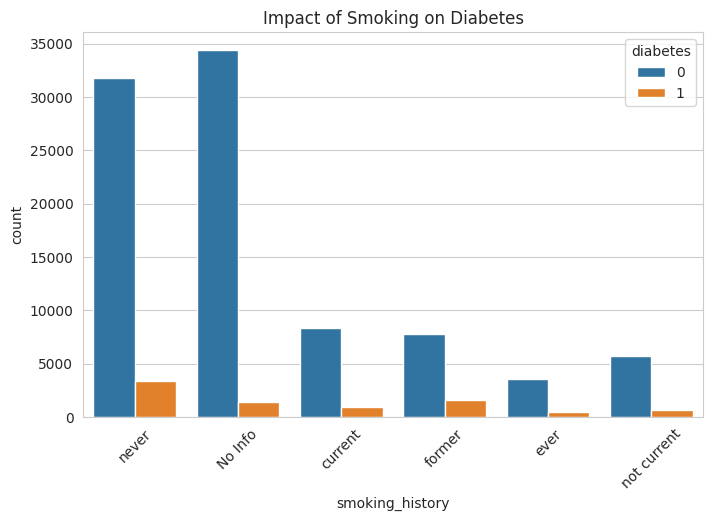

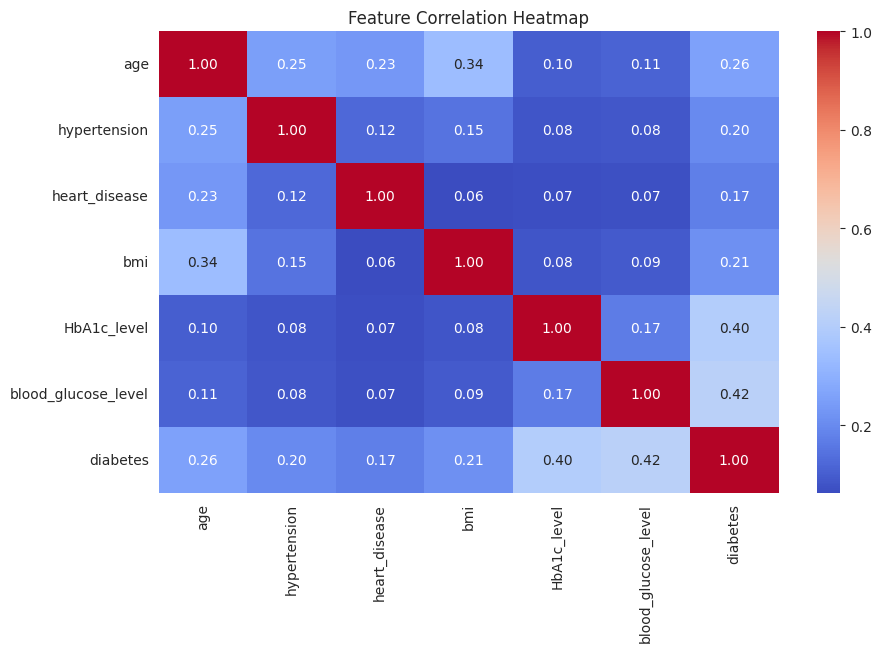

In [6]:
# 3. Bivariate & Multivariate Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x="diabetes", y="age", data=df)
plt.title("Age vs Diabetes")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("BMI vs Diabetes")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="smoking_history", hue="diabetes", data=df)
plt.title("Impact of Smoking on Diabetes")
plt.xticks(rotation=45)
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


-Older individuals have a higher risk of diabetes.

-Higher BMI is correlated with diabetes.

-Smoking history seems to have an influence, with current smokers having a higher diabetes rate.


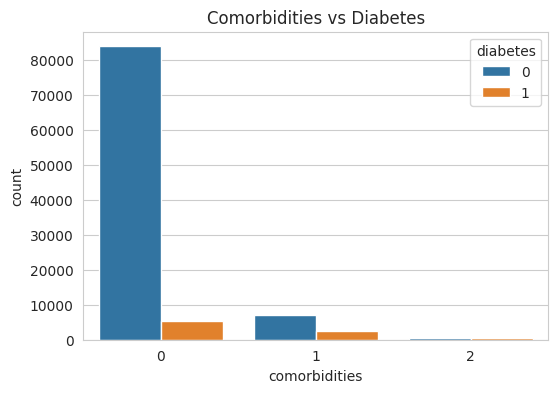

In [7]:
# 4. Comorbidity Analysis
df['comorbidities'] = df['hypertension'] + df['heart_disease']
plt.figure(figsize=(6,4))
sns.countplot(x="comorbidities", hue="diabetes", data=df)
plt.title("Comorbidities vs Diabetes")
plt.show()


-Blood glucose level and HbA1c level are strongly correlated with diabetes.

-BMI has a moderate correlation with diabetes.

-Hypertension and heart disease show some correlation with diabetes but are not primary drivers.


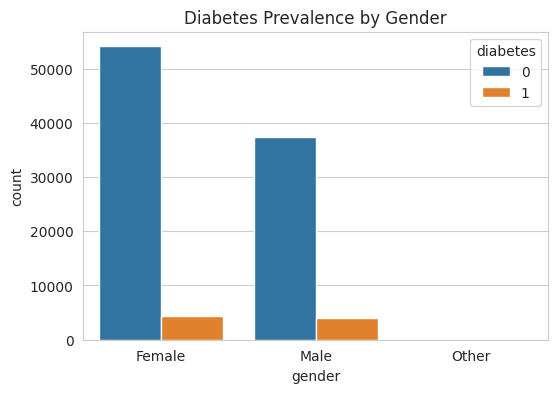

In [8]:
# 5. Gender and Health Outcome Disparities

plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="diabetes", data=df)
plt.title("Diabetes Prevalence by Gender")
plt.show()


1)Older Age (50+ years) → Higher risk of diabetes.

2)BMI > 30 (Obese category) → Strongly linked to diabetes.

3)Blood Glucose Level > 160 mg/dL → Clear indication of diabetes.

4)Hypertension & Heart Disease patients → Slightly increased risk.

5)Current Smokers → Higher probability of diabetes.

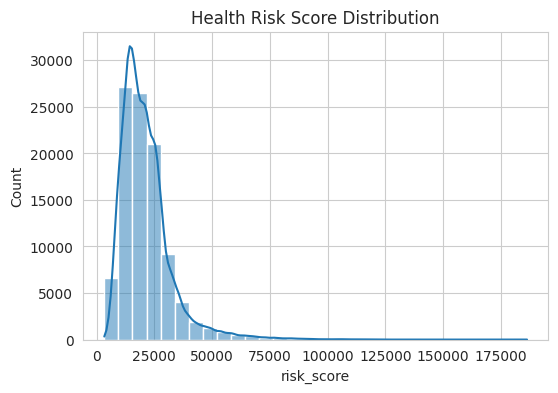

In [9]:
# 6. Anomaly Detection & Risk Stratification

df['risk_score'] = df['bmi'] * df['HbA1c_level'] * df['blood_glucose_level']
plt.figure(figsize=(6,4))
sns.histplot(df['risk_score'], bins=30, kde=True)
plt.title("Health Risk Score Distribution")
plt.show()


In [10]:
# 7. Feature Engineering

df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])
df['bmi_x_hba1c'] = df['bmi'] * df['HbA1c_level']
df['age_x_bmi'] = df['age'] * df['bmi']

print("Feature Engineering Completed!")


Feature Engineering Completed!


NUMERICAL PERCENTAGE DATA

In [13]:
# 1️⃣ Percentage of Males and Females
gender_counts = df['gender'].value_counts(normalize=True) * 100
print("Gender Distribution:")
print(gender_counts)

# 2️⃣ Percentage of People in Different Age Groups
age_group_counts = df['age_group'].value_counts(normalize=True) * 100
print("\nAge Group Distribution:")
print(age_group_counts)

# 3️⃣ Percentage of People with Diabetes vs. Non-Diabetic
diabetes_counts = df['diabetes'].value_counts(normalize=True) * 100
print("\nDiabetes Distribution:")
print(diabetes_counts)

# 4️⃣ Percentage of People with Comorbidities
comorbid_counts = df['comorbidities'].value_counts(normalize=True) * 100
print("\nComorbidities Distribution:")
print(comorbid_counts)

# 5️⃣ Percentage of People in BMI Ranges (Optional)
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_counts = df['bmi_category'].value_counts(normalize=True) * 100
print("\nBMI Category Distribution:")
print(bmi_counts)


Gender Distribution:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

Age Group Distribution:
age_group
41-60    29.496
21-40    25.968
61+      23.632
0-20     20.904
Name: proportion, dtype: float64

Diabetes Distribution:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

Comorbidities Distribution:
comorbidities
0    89.489
1     9.595
2     0.916
Name: proportion, dtype: float64

BMI Category Distribution:
bmi_category
Overweight     45.767
Obese          23.881
Normal         21.831
Underweight     8.521
Name: proportion, dtype: float64


## **Extra Visualization**

In [11]:
import plotly.graph_objects as go
from collections import Counter
import pandas as pd

# Sample data (Replace with your actual dataframe `df`)
data = {
    "hypertension": df['hypertension'],
    "heart_disease": df['heart_disease'],
    "smoking_history": df['smoking_history'],
    "diabetes": df['diabetes']
}

# Convert to DataFrame
df1 = pd.DataFrame(data)

# Define source, target, and values
source = []
target = []
value = []

# Categories to analyze
risk_factors = ['hypertension', 'heart_disease', 'smoking_history']

# Count occurrences of each category within the diabetes group
for factor in risk_factors:
    counts = Counter(zip(df1[factor], df1['diabetes']))
    for (risk, outcome), count in counts.items():
        source.append(f"{factor}_{risk}")  # e.g., 'hypertension_1'
        target.append(f"Diabetes_{outcome}")  # e.g., 'Diabetes_1'
        value.append(count)  # Frequency count

# Convert to indices for Sankey chart
all_labels = list(set(source + target))
label_indices = {label: i for i, label in enumerate(all_labels)}

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=all_labels
    ),
    link=dict(
        source=[label_indices[s] for s in source],
        target=[label_indices[t] for t in target],
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram: Flow of Diabetes from Risk Factors", font_size=12)
fig.show()


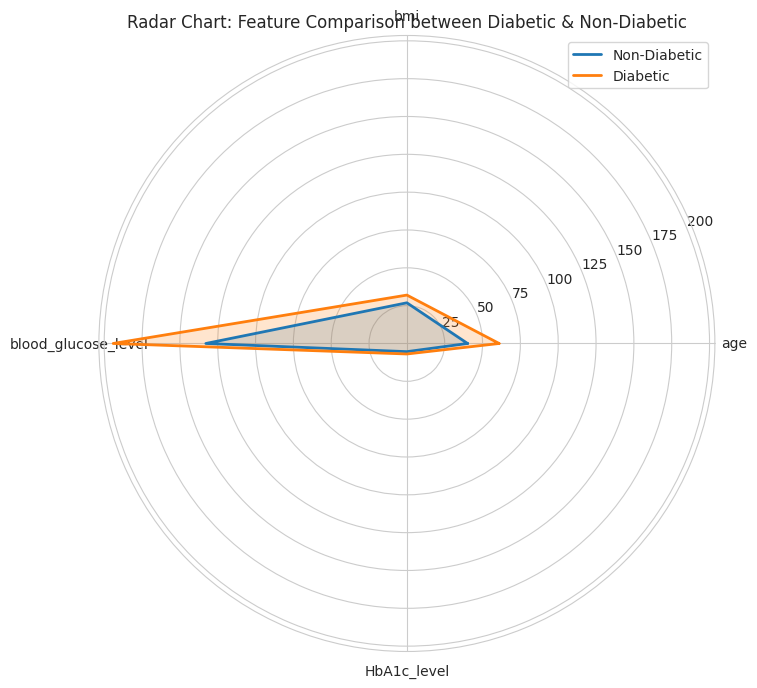

In [12]:
from math import pi

# Calculate mean values for each feature by diabetes group
grouped_data = df.groupby('diabetes')[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']].mean()

# Define angles for the radar chart
categories = list(grouped_data.columns)
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Close the circle

# Plot radar chart
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Plot for non-diabetic individuals
values = grouped_data.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Non-Diabetic')
ax.fill(angles, values, alpha=0.2)

# Plot for diabetic individuals
values = grouped_data.iloc[1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Diabetic')
ax.fill(angles, values, alpha=0.2)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Radar Chart: Feature Comparison between Diabetic & Non-Diabetic")
plt.legend()
plt.show()
